In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Advertising.csv")
df.columns = ['index' , 'TV','Radio' , 'Newspaper','Sales']
label = df.pop('Sales')

data =df.drop(columns=['index'])
x_train = tf.constant(data)
y_train = tf.constant(label)



In [2]:
w = tf.get_variable(name='Variables',initializer= tf.constant([0.01,0.02,0.03],dtype=tf.float64),dtype=tf.float64)
b = tf.Variable(5,dtype=tf.float64) 


In [3]:
w = tf.reshape(w,shape=[3,1])

In [4]:
y_pred = tf.add(tf.matmul(x_train,w),b)
errors = tf.reduce_mean(tf.square(y_pred-y_train))

In [5]:
optimizer = tf.train.AdagradOptimizer(0.001).minimize(errors)

In [6]:
init = tf.global_variables_initializer()

In [7]:
sess = tf.Session()
sess.run(init)
sess.run(optimizer)
print(sess.run(w))
print(sess.run(b))
print(sess.run(errors))

[[0.011]
 [0.021]
 [0.031]]
5.000999671875709
64.39652589628915


In [8]:
var = np.array(sess.run(w))
bias = sess.run(b)
npdata= np.array(data)
datapred = np.dot(npdata,var) + bias

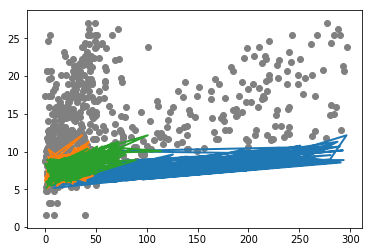

In [10]:
plt.scatter(data['TV'],label,c='gray')
plt.scatter(data['Radio'],label,c='gray')
plt.scatter(data['Newspaper'],label,c='gray')
plt.plot(data,datapred,linewidth=2)